## Instacart Market Basket Analysis

Instacart is a retail company that operates a grocery delivery and pick-up service. This service allows customers to order groceries from participating retailers with the shopping being done by a personal shopper. I am going to use Instacart user transactional data to predict which predict which previously purchased products will be in a user’s next order. 

### Table of Contents
1. Data Preprocessing
2. Exploratory Data Analysis
3. Market Basket Analysis
4. Conclusion


### Columns
- order_id: order unique identifier. this could include multiple product IDs, depending on the items purchased. 
- product_id: product unique identifier.
- add_to_cart_order: sequential number identifying number of items included in the same order.
- reordered: whether or not this item has been repurchased by the same customer.
- order_number: sequential number identifying order made by the same customer. each user's latest order is categorized as 'train', while all other previous orders are categorized as 'prior'.
- order_dow, order_hour_of_day: day and hour of purchase.
- days_since_prior_order: days since the previous order (not since the first order)
- department: large category of product
- aisle: detailed category of product 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
ais = pd.read_csv('aisles.csv')
dep = pd.read_csv('departments.csv')
ord_prior = pd.read_csv('order_products__prior.csv') 
ord_train = pd.read_csv('order_products__train.csv')  
orders = pd.read_csv('orders.csv')
prod = pd.read_csv('products.csv')
sub = pd.read_csv('sample_submission.csv')

### Data Preprocessing

In [44]:
# checking for n/a values

print(orders.info(show_counts = True), ord_prior.info(show_counts = True), ord_train.info(show_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3421083 non-null  int64  
 1   user_id                 3421083 non-null  int64  
 2   eval_set                3421083 non-null  object 
 3   order_number            3421083 non-null  int64  
 4   order_dow               3421083 non-null  int64  
 5   order_hour_of_day       3421083 non-null  int64  
 6   days_since_prior_order  3214874 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype
---  ------             --------------     -----
 0   order_id           32434489 non-null  int64
 1   product_id         32434489 non-null  int64
 2   add_to_cart_or

In [45]:
# check for duplicated values

print(ord_prior.duplicated().sum(), ord_train.duplicated().sum(), orders.duplicated().sum())

0 0 0


In [46]:
prod = prod.merge(dep, how = 'left', on= 'department_id')
prod = prod.merge(ais, how = 'left', on = 'aisle_id')
prod

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bakery,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets,cat food care


In [47]:
ord_prior = ord_prior.merge(prod, how = 'left', on = 'product_id')
ord_prior

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients
...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,household,dish detergents
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,snacks,crackers
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen,frozen breakfast
32434487,3421083,24852,9,1,Banana,24,4,produce,fresh fruits


In [48]:
ord_train = ord_train.merge(prod, how = 'left', on = 'product_id')
ord_train

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,other creams cheeses
2,1,10246,3,0,Organic Celery Hearts,83,4,produce,fresh vegetables
3,1,49683,4,0,Cucumber Kirby,83,4,produce,fresh vegetables
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,canned meat seafood
...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7,beverages,water seltzer sparkling water
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20,deli,prepared meals
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,dairy eggs,soy lactosefree
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13,pantry,spreads


### Exploratory Data Analysis

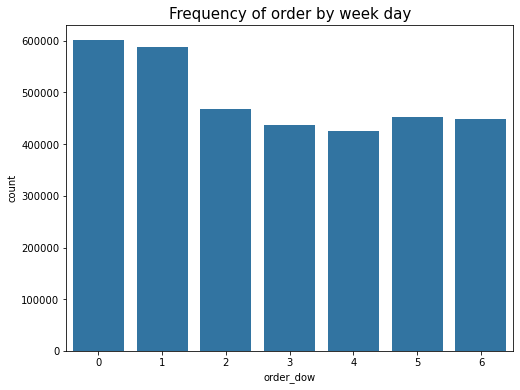

In [49]:
color = sns.color_palette()[0]
plt.figure(figsize=(8,6))
sns.countplot(x="order_dow", data=orders,color = color)
plt.title("Frequency of order by week day", fontsize=15);

Most users completes grocery shopping on Monday and Tuesday. Probably users take the activity as one of task in their 'to-do list' and want to get it done during weekdays!

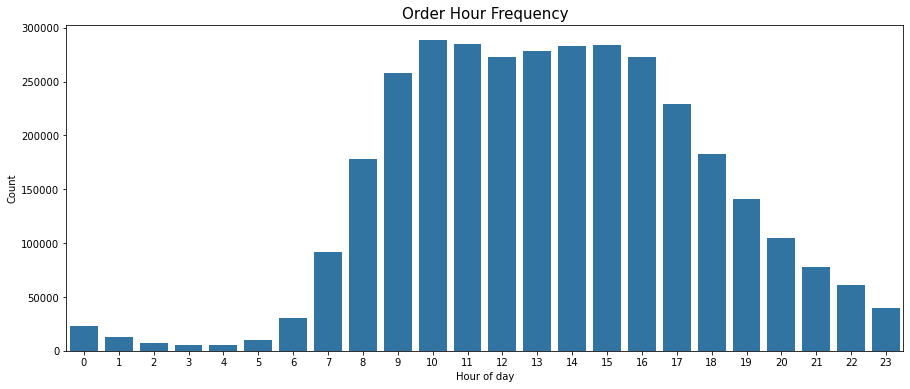

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(x="order_hour_of_day", data=orders, color=color)
plt.ylabel('Count')
plt.xlabel('Hour of day')
plt.title("Order Hour Frequency", fontsize=15);

Customer usually place an order during daytime, between 9 AM and 5 PM.

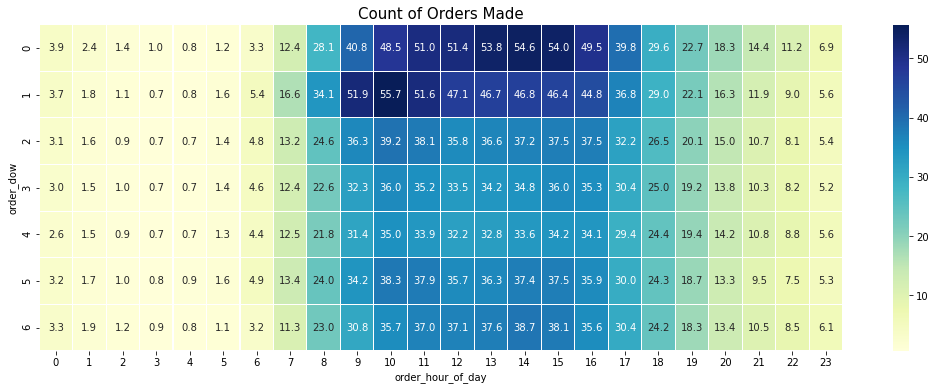

In [51]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].agg(lambda x: len(x)/1000).reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(18,6))
sns.heatmap(grouped_df, cmap = 'YlGnBu', annot=True, fmt="1.1f", linewidths = .1)
plt.title("Count of Orders Made", size = 15);

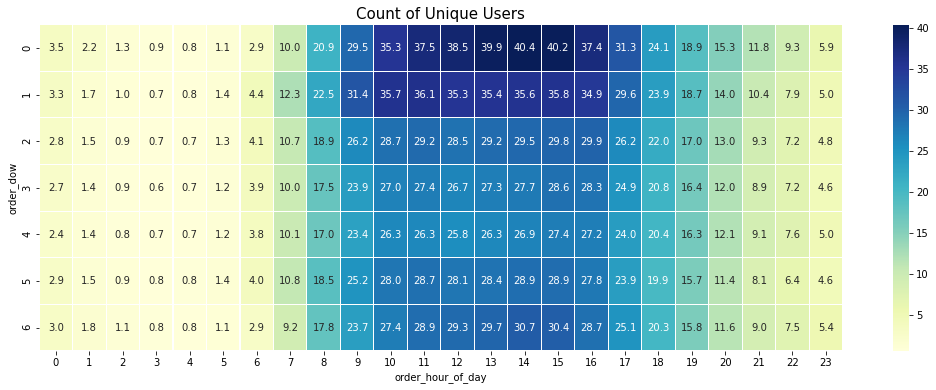

In [52]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["user_id"].agg(lambda x: x.nunique()/1000).reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'user_id')

plt.figure(figsize=(18,6))
sns.heatmap(grouped_df, cmap = 'YlGnBu', annot=True, fmt="1.1f", linewidths = .1)
plt.title("Count of Unique Users", size = 15);

Orders are most frequently made on Mondays (especially once the lunch time is over, afted getting urgent tasks done in the morning), and on Tuesdays at the office. We can guess that customers consider groceries shopping as work. If we are going to have a promotion which is only going on during limited days or hours, daytime on Mondays & Tuesdays could be the best. 

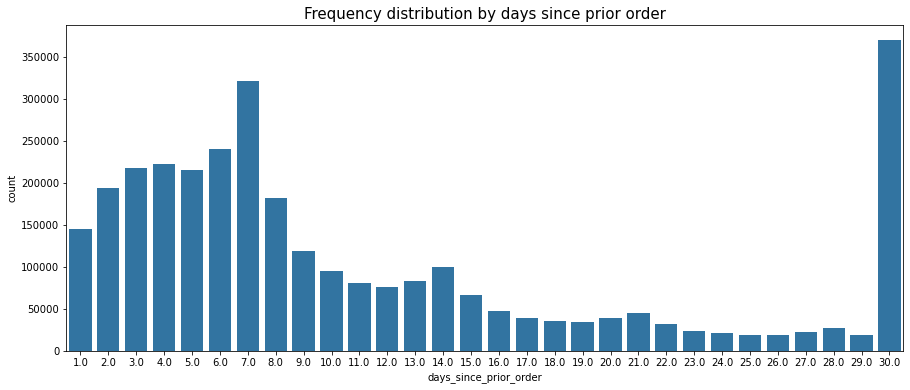

In [53]:
plt.figure(figsize=(15,6))
sns.countplot(x="days_since_prior_order", data=orders.query('days_since_prior_order > 0'), color=color)
plt.title("Frequency distribution by days since prior order", fontsize=15);

Most users purchase items every 1 month or less than 1 week, which is kinda extreme. I assume they have pretty different purchasing pattern in terms of items, do they?

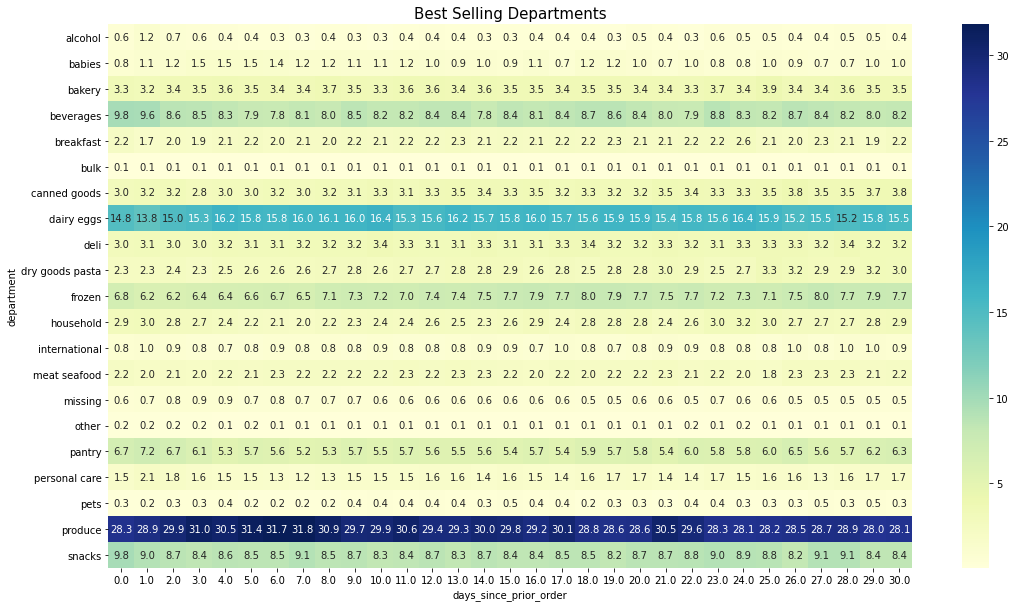

In [54]:
ord_train_prod = ord_train.merge(orders, how = 'left', on = ['order_id'])
ord_train_pivot = ord_train_prod.groupby('days_since_prior_order')['department'].value_counts(normalize = True).mul(100).rename('percentage').reset_index()
grouped_df = ord_train_pivot.pivot(values = 'percentage', index = 'department', columns = 'days_since_prior_order')

plt.figure(figsize=(18,10))
sns.heatmap(grouped_df, cmap = 'YlGnBu', annot=True, fmt="1.1f")
plt.title("Best Selling Departments", size = 15);

- Users who do the shopping (interval of less than 1 week) tend to buy more produce (fruits and vegetables) than those who don't buy often (interval of 20+ days), because of the short expiry date.
- On the contrary, users who don't shop often are highly likely to buy frozen more than others.

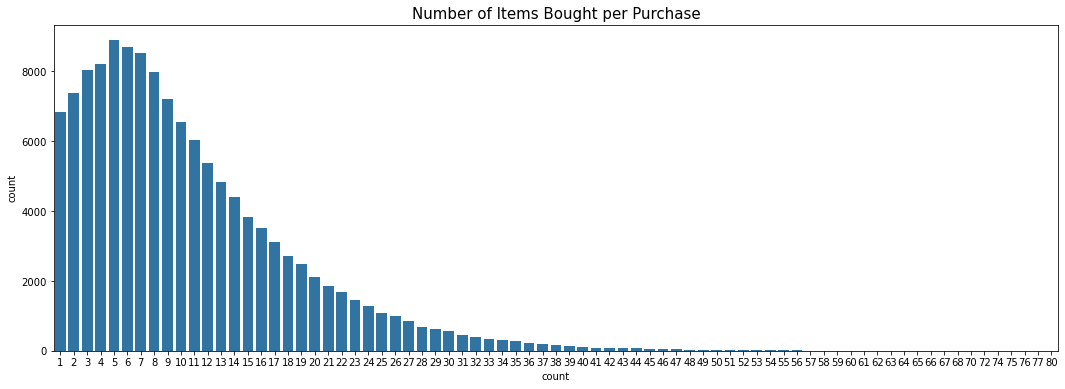

In [55]:
max_num = ord_train.groupby('order_id').add_to_cart_order.max().reset_index(name= 'count')
plt.figure(figsize=(18,6))
sns.countplot(x="count", data=max_num, color=color)
plt.title("Number of Items Bought per Purchase", fontsize=15);

사람들은 한번 구매할 때 5-7개 물건을 구매한다. 그런데 이건 애들 구매 물품과 간격을 봤을 때 좀 많이 산다 싶다. 아마도 배송비때문일것.
사람들의 쇼핑 간격과 (1주일에서 1달) 구매 물품들을 봤을 때 (농산품. 게다가 1달만에 사는 사람들이라도 농산물을 가장 많이 삼) 사람들은 이걸 거의 농산물로 산다. 그러면 배송비만 없다면 더 자주 구매하고 싶을 것이고, 경제적인 손해가 크지 않다면 더 자주 구매할 것. 그러면 무료 배송 허들을 낮추면 어떨까?

- Customers purchase 5 items at a time, probably because of a delivery fee charged. 한개는 배송비떄문에 못사고, 여러개는 또 유통기한이 있기 때문에 한번에 많이 못삼. 그래서 보통 5개정도 삼. 
그렇다고 유통기한을 무시하고 한번에 더 많이 구매하게 하는건 소비자 패턴에 어긋나는거니까, 소액으로라도 더 자주 주문하는 것에 대한 부담을 낮추면 되잖아? 신선식품을 주로 주문하는 사람들에게 배송비를 낮춰주는건 어떨까? 그러면 여기서 사는게 더 편하니까 습관을 들이겠지.
- Combining the finding in the previous plot, people usually purchase 5-8 number of items at a time every 1 week or 1 month of interval.

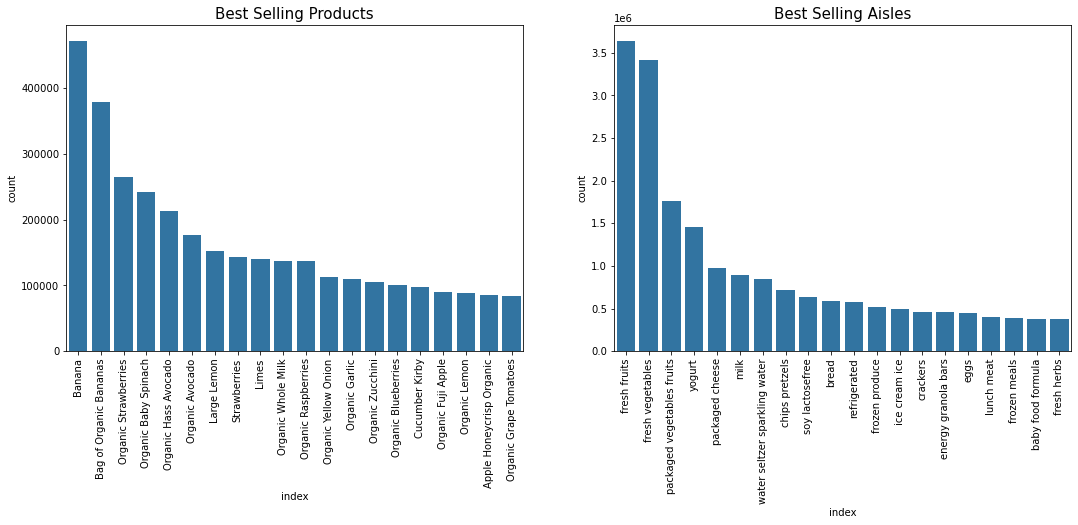

In [56]:
# 가장 구매가 많은 aisle과 상품명

ord_prior_merge = orders.merge(ord_prior, how = 'inner', on = 'order_id')
ord_prod = ord_prior_merge['product_name'].value_counts().reset_index(name = 'count').head(20)
ord_aisle = ord_prior_merge['aisle'].value_counts().reset_index(name = 'count').head(20)

fig,ax = plt.subplots(1,2, figsize = (18,6))
sns.barplot(x= 'index',y = 'count', data = ord_prod, color = color,ax = ax[0])
ax[0].set_xticklabels(labels = ord_prod['index'],rotation = 90)
ax[0].set_title("Best Selling Products", size = 15)

sns.barplot(x = ord_aisle['index'], y= ord_aisle['count'], ax = ax[1], color = color)
ax[1].set_xticklabels(labels = ord_aisle['index'],rotation =90)
ax[1].set_title("Best Selling Aisles", size = 15);

Produce including bananas, strawberries and spinach are the most frequently purchased items in the whole marketplace. Given users' strong preference towards produce, we can consider suggesting a recipe using vegetables & fruits daily so that people can prepare easily, in the description page.

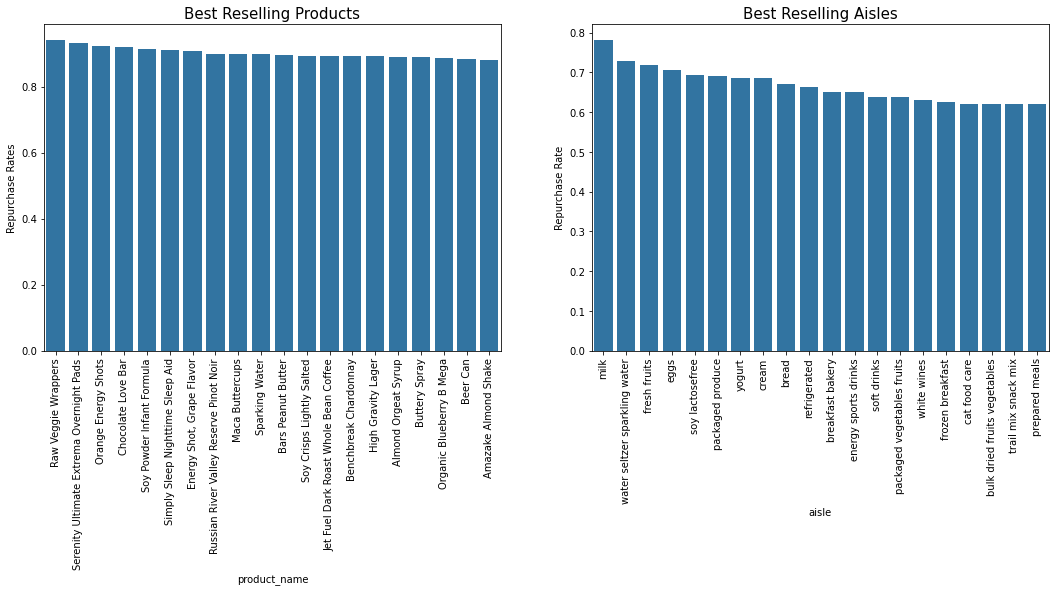

In [57]:
reord_prod = ord_prior_merge.groupby('product_name').reordered.mean().sort_values(ascending = False).head(20).reset_index()
reord_aisle = ord_prior_merge.groupby('aisle').reordered.mean().sort_values(ascending = False).head(20).reset_index()

fig,ax = plt.subplots(1,2, figsize = (18,6))
sns.barplot(x = reord_prod['product_name'], y= reord_prod['reordered'], ax = ax[0], color = color)
ax[0].set_xticklabels(labels = reord_prod['product_name'],rotation =90)
ax[0].set_title("Best Reselling Products", size = 15)
ax[0].set_ylabel("Repurchase Rates")

sns.barplot(data = reord_aisle, x = 'aisle', y= 'reordered', color = color,ax = ax[1])
ax[1].set_xticklabels(labels = reord_aisle['aisle'],rotation = 90)
ax[1].set_ylabel("Repurchase Rate")
ax[1].set_title("Best Reselling Aisles", size = 15);

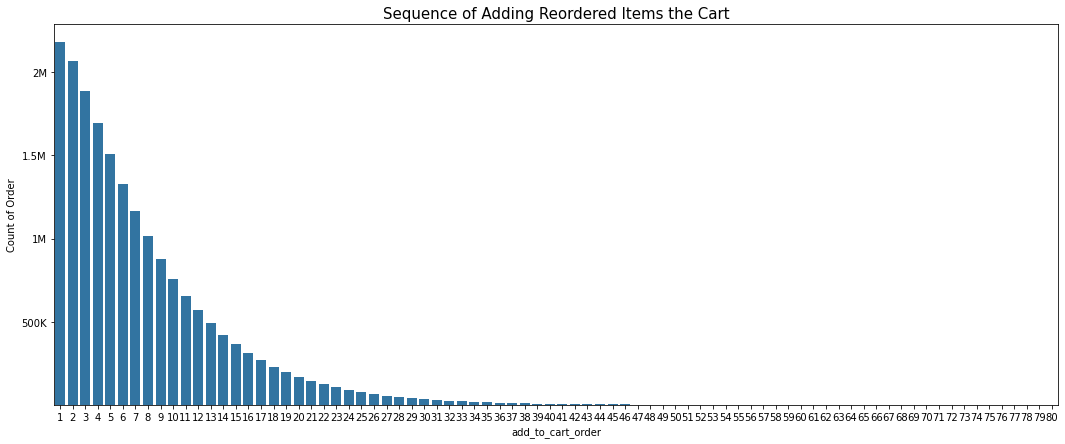

In [58]:
# 카트에 담기는 순서와 재구매. 한번 구매한적 있는 것이 다음번 카트에 담기는 순서.

ord_num = ord_prior_merge.query('reordered == 1').groupby('add_to_cart_order').count()['order_number'].reset_index().head(80)
plt.figure(figsize = (18,7))
sns.barplot(data = ord_num, x = 'add_to_cart_order', y= 'order_number', color = color)
plt.title("Sequence of Adding Reordered Items the Cart", size = 15)
plt.yticks([500000,1000000,1500000,2000000], labels = ['500K', '1M', '1.5M', '2M'])
plt.ylabel("Count of Order");

In [59]:
hour_product_ds = ord_prior_merge.groupby(['product_name','order_hour_of_day'], as_index=False).agg({'order_id':'count'})
hour_top_product = []
for (key, rows) in hour_product_ds.groupby('order_hour_of_day'):
    sub_ds = rows.sort_values('order_id', ascending=False)[:20]
    sub_ds['rank'] = list(range(1,20+1))
    hour_top_product.append(sub_ds)
    
hour_top_product_ds= pd.concat(hour_top_product)
hour_top_product_pivot_ds = hour_top_product_ds.pivot(index='order_hour_of_day', columns='product_name', values='rank')
pivot_ds = hour_top_product_pivot_ds.applymap(lambda x:hour_top_product_pivot_ds.max().max()-x+1)
pivot_ds.head()

product_name,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Carrots,Cucumber Kirby,Half & Half,Honeycrisp Apple,Large Lemon,Limes,Organic Avocado,...,Organic Raspberries,Organic Red Onion,Organic Strawberries,Organic Whole Milk,Organic Yellow Onion,Organic Zucchini,Seedless Red Grapes,Sparkling Water Grapefruit,Spring Water,Strawberries
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,NaN,19.0,20.0,NaN,6.0,NaN,NaN,14.0,13.0,15.0,...,10.0,NaN,18.0,11.0,5.0,7.0,2.0,NaN,NaN,12.0
1,NaN,19.0,20.0,NaN,7.0,NaN,NaN,14.0,13.0,15.0,...,11.0,1.0,17.0,10.0,8.0,6.0,3.0,NaN,NaN,12.0
2,NaN,19.0,20.0,NaN,4.0,NaN,NaN,14.0,12.0,15.0,...,11.0,2.0,17.0,9.0,5.0,6.0,NaN,NaN,NaN,13.0
3,NaN,19.0,20.0,2.0,7.0,NaN,NaN,14.0,13.0,15.0,...,10.0,NaN,17.0,4.0,5.0,9.0,NaN,NaN,3.0,12.0
4,NaN,19.0,20.0,NaN,9.0,NaN,NaN,15.0,12.0,14.0,...,11.0,NaN,18.0,7.0,6.0,8.0,1.0,NaN,NaN,13.0


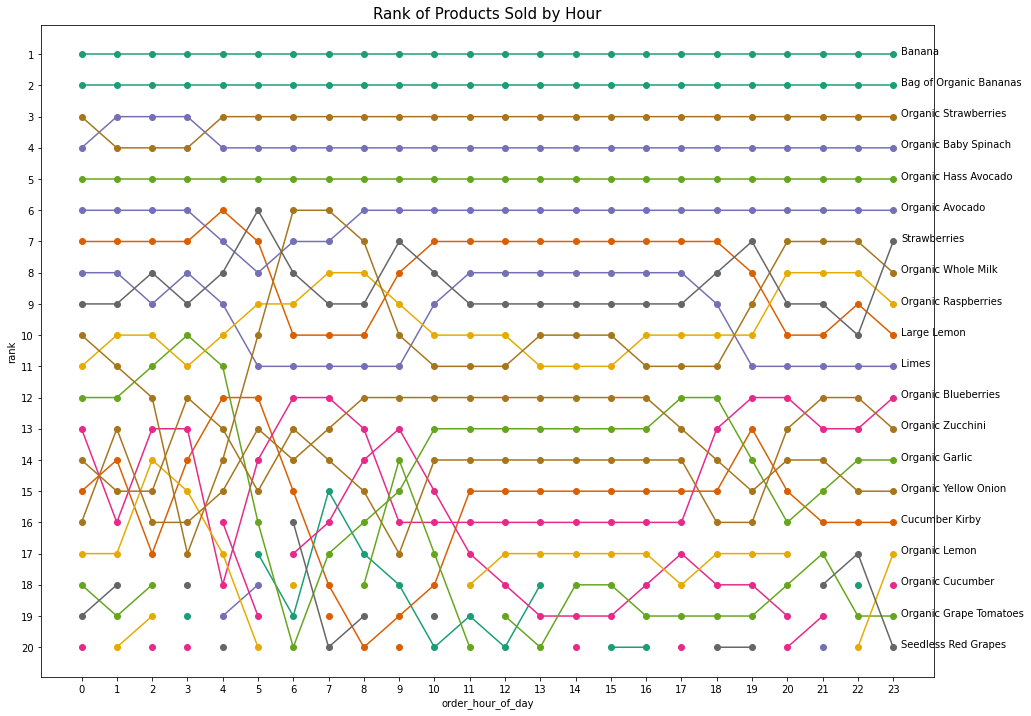

In [60]:
pivot_ds.plot(marker='o', figsize=(16,12), cmap='Dark2', xticks=pivot_ds.index, legend=None) 
plt.yticks(np.arange(20, 0, -1), np.arange(1, 20+1))
for name, rank in pivot_ds.loc[23].sort_values(ascending=False).dropna().iteritems():
    plt.text(23*1.01,rank,name)
plt.ylabel("rank")
plt.title("Rank of Products Sold by Hour", size = 15); 

- Just like we have seen in the previous plot, banana is all time no.1 best selling product.
- Banana, strawberry, spinach and avocado always have similar demand from customers. 
- 

In [61]:
dow_product_ds = ord_prior_merge.groupby(['product_name','order_dow'], as_index=False).agg({'order_id':'count'})
dow_product = []
for (key, rows) in dow_product_ds.groupby('order_dow'):
    sub_ds = rows.sort_values('order_id', ascending=False)[:20]
    sub_ds['rank'] = list(range(1,20+1))
    dow_product.append(sub_ds)
dow_product_ds= pd.concat(dow_product)
dow_top_product_pivot_ds = dow_product_ds.pivot(index='order_dow', columns='product_name', values='rank')
pivot_ds = dow_top_product_pivot_ds.applymap(lambda x:dow_top_product_pivot_ds.max().max()-x+1)

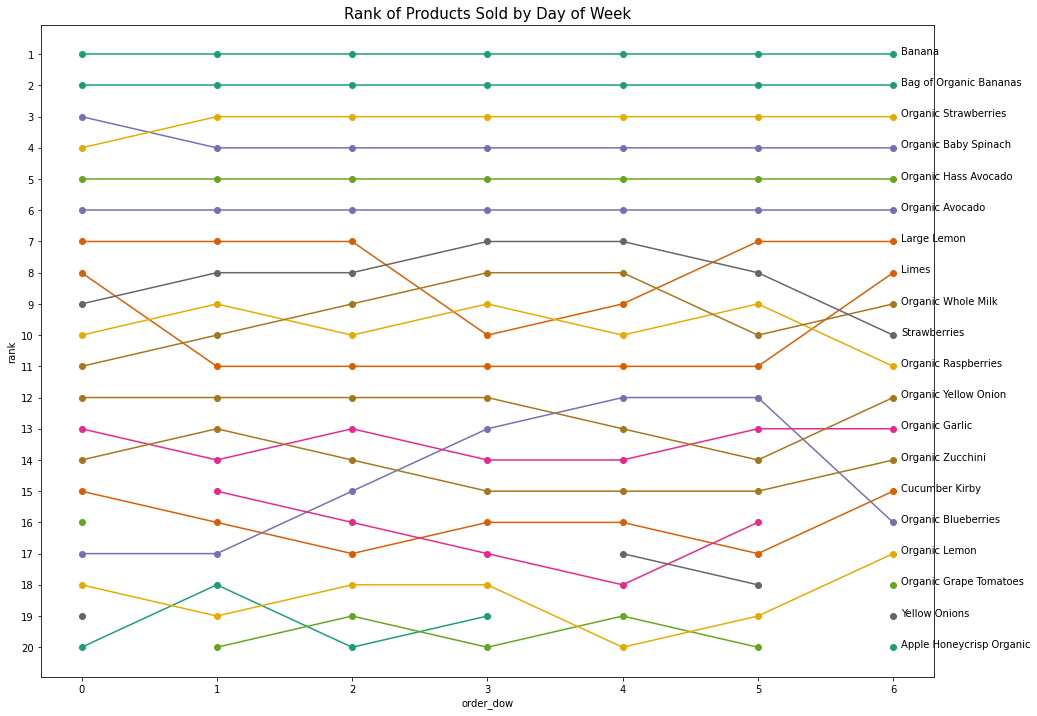

In [62]:
pivot_ds.plot(marker='o', figsize=(16,12), cmap='Dark2', xticks=pivot_ds.index, legend=None) 
plt.yticks(np.arange(20, 0, -1), np.arange(1, 20+1))

for name, rank in pivot_ds.loc[6].sort_values(ascending=False).dropna().iteritems():
    plt.text(6*1.01,rank,name)
plt.ylabel("rank")
plt.title("Rank of Products Sold by Day of Week", size = 15); 

Instacart delivery starts at $3.99 for same-day orders $35 or more. Fees vary for one-hour deliveries, club store deliveries, and deliveries under $35. There will be a clear indication of the delivery fee when you are choosing your delivery window. 

As always, Instacart Express members get free delivery on orders $35 or more per retailer. 

All orders must be at least $10 before being eligible for delivery.

그날 필요한 것

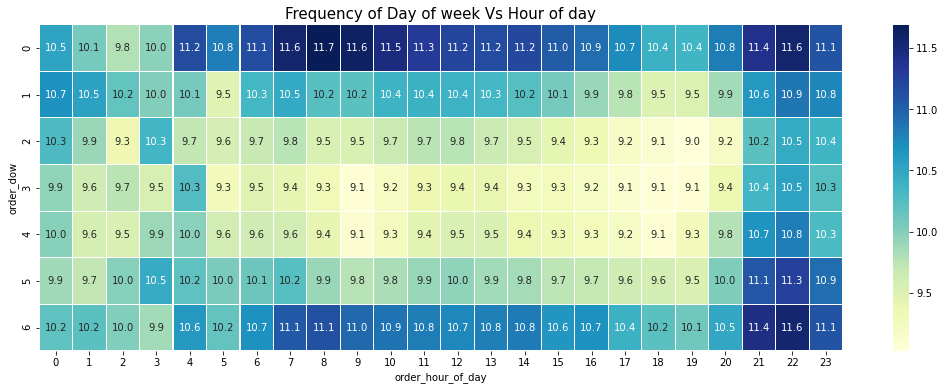

In [63]:
order_product_total = ord_prior.groupby('order_id')['product_id'].count().to_frame("product_cnt").reset_index()
orders_cnt = orders.merge(order_product_total, on = 'order_id', how = 'inner')
orders_pivot = orders_cnt.pivot_table(index ='order_dow' , columns = 'order_hour_of_day', values = 'product_cnt', aggfunc=lambda x: np.mean(x))

plt.figure(figsize=(18,6))
sns.heatmap(orders_pivot, cmap = 'YlGnBu', annot=True, fmt="1.1f", linewidths = .1)
plt.title("Frequency of Day of week Vs Hour of day", size = 15);

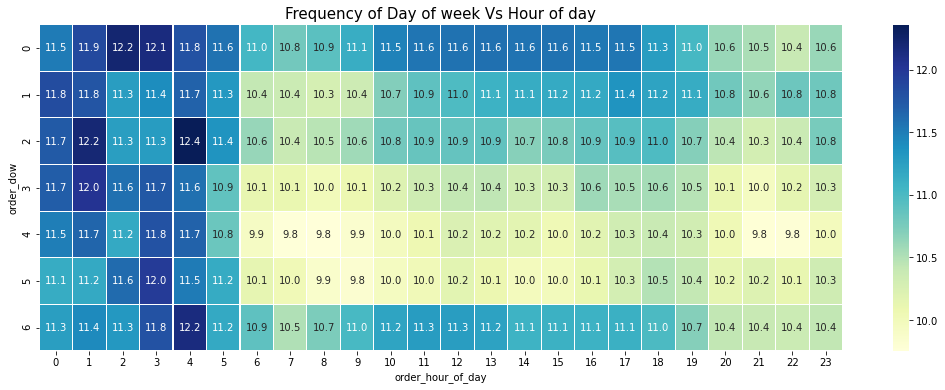

In [64]:
orders_pivot = orders_cnt.pivot_table(index ='order_dow' , columns = 'order_hour_of_day', values = 'days_since_prior_order', aggfunc=lambda x: np.mean(x))

plt.figure(figsize=(18,6))
sns.heatmap(orders_pivot, cmap = 'YlGnBu', annot=True, fmt="1.1f", linewidths = .1)
plt.title("Frequency of Day of week Vs Hour of day", size = 15);

Average Days Since Prior Order 10.71 Days


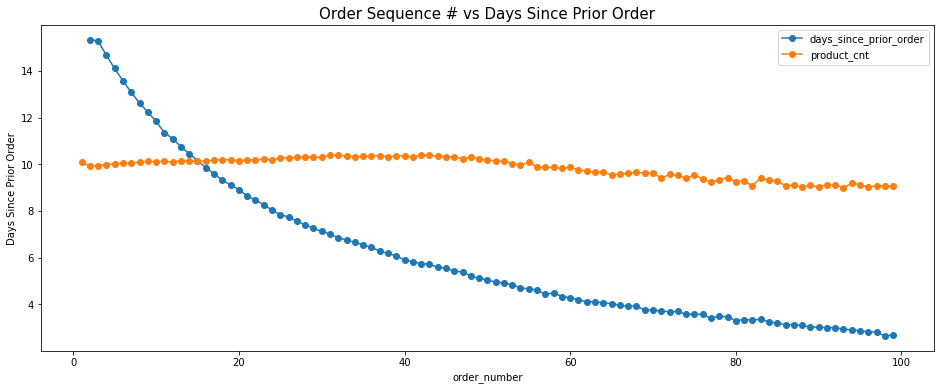

In [66]:
print("Average Days Since Prior Order {} Days".format(round(orders_cnt.days_since_prior_order.mean(),2)))

# 구매 횟수가 늘어날때마다 평균 쇼핑 간격 및 평균 구매 물건 갯수

orders_plot = orders_cnt.groupby('order_number').agg({'days_since_prior_order':np.mean, 'product_cnt':np.mean})
orders_plot.plot(figsize=(16,6), marker='o')
plt.ylabel('Days Since Prior Order')
plt.title("Order Sequence # vs Days Since Prior Order", size= 15);

In [67]:
# overall repurchase rate

round(ord_prior_merge.query('days_since_prior_order > 0').groupby('reordered').count()['order_id'] *100 / ord_prior_merge.query('days_since_prior_order > 0').shape[0],2)

reordered
0    37.16
1    62.84
Name: order_id, dtype: float64

Second purchase onward the ration of product reordered is 62.84 %, which is high enough for us to tell that customers tend to buy the products again which they have purchased in the past.

Average Reordered Product Ratio: 0.63


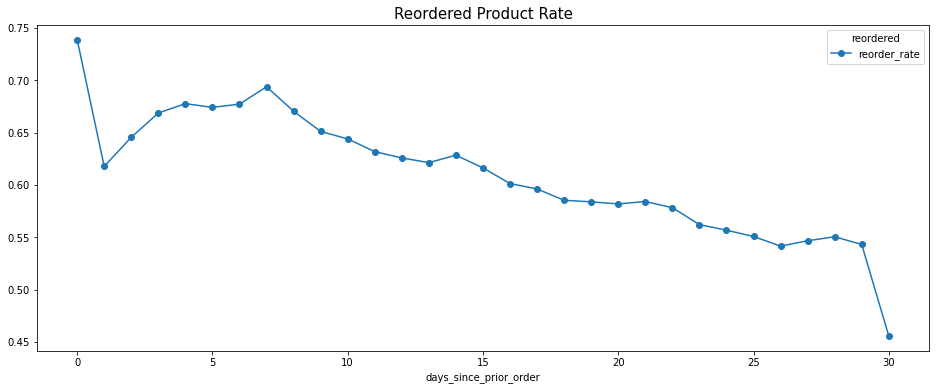

In [68]:
reordered_since_days_ds = ord_prior_merge.groupby(['days_since_prior_order','reordered']).agg({'product_id':'count'})
reordered_since_days_ds = reordered_since_days_ds.reset_index().pivot(index='days_since_prior_order', columns='reordered', values='product_id')
reordered_since_days_ds['reorder_rate'] = reordered_since_days_ds[1] /reordered_since_days_ds.sum(axis=1)

print("Average Reordered Product Ratio: {}".format(round(reordered_since_days_ds[1].sum() / reordered_since_days_ds[[0,1]].sum().sum(),2)))

reordered_since_days_ds[['reorder_rate']].plot(kind='line', marker='o',figsize=(16,6))
plt.title("Reordered Product Rate", fontsize=15);

### Market Basket Analysis

In [69]:
# feature engineering
# users

users = ord_prior_merge.groupby('user_id')['order_number'].max().to_frame('user_num_orders').reset_index()
total_product_per_order = ord_prior_merge.groupby(['user_id', 'order_id'])['product_id'].count().to_frame("total_prod_per_order").reset_index()
avg_product_per_user = total_product_per_order.groupby(['user_id'])['total_prod_per_order'].mean().to_frame("user_avg_prod").reset_index()
del total_product_per_order 

dow = ord_prior_merge.groupby('user_id')['order_dow'].agg(lambda x: x.mode()[0]).to_frame('most_day')
hod = ord_prior_merge.groupby('user_id')['order_hour_of_day'].agg(lambda x: x.mode()[0]).to_frame('most_hour')
users = users.merge(avg_product_per_user, on = 'user_id', how = 'left')
users = users.merge(dow, on = 'user_id')
users = users.merge(hod, on = 'user_id')
users

,user_id,user_num_orders,user_avg_prod,most_day,most_hour
0,1,10,5.900000,4,7
1,2,14,13.928571,2,9
2,3,12,7.333333,0,16
3,4,5,3.600000,4,15
4,5,4,9.250000,3,18
...,...,...,...,...,...
206204,206205,3,10.666667,4,12
206205,206206,67,4.253731,0,18
206206,206207,16,13.937500,1,12
206207,206208,49,13.816327,2,15


In [70]:
prd = ord_prior_merge.groupby('product_id')['order_number'].count().to_frame('prod_count')
repur = ord_prior_merge.groupby('product_id')['reordered'].mean().to_frame('reordered_ratio')
product = prd.merge(repur, on = 'product_id')
product

,prod_count,reordered_ratio
product_id,,
1,1852,0.613391
2,90,0.133333
3,277,0.732852
4,329,0.446809
5,15,0.600000
...,...,...
49684,9,0.111111
49685,49,0.122449
49686,120,0.700000


In [72]:
user_product = ord_prior_merge.groupby(['user_id', 'product_id'])['order_number'].count().to_frame('user_prod_count').reset_index()
user_prod_reorder_ratio = ord_prior_merge.groupby(['user_id', 'product_id'])['reordered'].mean().to_frame('user_prod_reorder').reset_index()
user_product = user_product.merge(user_prod_reorder_ratio, on = ['user_id', 'product_id'], how = 'left')
user_product = user_product.reset_index(drop= True)
user_product

,user_id,product_id,user_prod_count,user_prod_reorder
0,1,196,10,0.900000
1,1,10258,9,0.888889
2,1,10326,1,0.000000
3,1,12427,10,0.900000
4,1,13032,3,0.666667
...,...,...,...,...
13307948,206209,43961,3,0.666667
13307949,206209,44325,1,0.000000
13307950,206209,48370,1,0.000000
13307951,206209,48697,1,0.000000


In [73]:
orders_future = orders[(orders['eval_set']=='train') | (orders['eval_set']== 'test')]
orders_future= orders_future[['user_id', 'eval_set', 'order_id']]
orders_future

,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797
...,...,...,...
3420933,206205,train,1716008
3421001,206206,test,1043943
3421018,206207,test,2821651
3421068,206208,test,803273


In [74]:
data = user_product.merge(users, on = 'user_id', how = 'left')
data = data.merge(product, on = 'product_id', how = 'left')
data= data.merge(orders_future, on = 'user_id', how = 'left')
data

,user_id,product_id,user_prod_count,user_prod_reorder,user_num_orders,user_avg_prod,most_day,most_hour,prod_count,reordered_ratio,eval_set,order_id
0,1,196,10,0.900000,10,5.900000,4,7,35791,0.776480,train,1187899
1,1,10258,9,0.888889,10,5.900000,4,7,1946,0.713772,train,1187899
2,1,10326,1,0.000000,10,5.900000,4,7,5526,0.652009,train,1187899
3,1,12427,10,0.900000,10,5.900000,4,7,6476,0.740735,train,1187899
4,1,13032,3,0.666667,10,5.900000,4,7,3751,0.657158,train,1187899
...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961,3,0.666667,13,9.923077,1,12,55371,0.630583,train,272231
13307949,206209,44325,1,0.000000,13,9.923077,1,12,3485,0.401148,train,272231
13307950,206209,48370,1,0.000000,13,9.923077,1,12,3934,0.699288,train,272231
13307951,206209,48697,1,0.000000,13,9.923077,1,12,9783,0.357661,train,272231


In [82]:
train2 = data[data['eval_set']=='train']
train2 = train2.merge(ord_train[['reordered', 'order_id', 'product_id']], on = ['order_id', 'product_id'], how = 'left').fillna(0)
train2 = train2.drop(columns = ['eval_set', 'order_id'])
train2 = train2.set_index(['user_id', 'product_id'])
train2

user_prod_count  user_prod_reorder  user_num_orders  \
user_id product_id                                                        
1       196                      10           0.900000               10   
        10258                     9           0.888889               10   
        10326                     1           0.000000               10   
        12427                    10           0.900000               10   
        13032                     3           0.666667               10   
...                             ...                ...              ...   
206209  43961                     3           0.666667               13   
        44325                     1           0.000000               13   
        48370                     1           0.000000               13   
        48697                     1           0.000000               13   
        48742                     2           0.500000               13   

                    user_avg_prod  most_day  most_hour  prod_count  \
user_id product_id                                                   
1       196              5.900000         4          7       35791   
        10258            5.900000         4          7        1946   
        10326            5.900000         4          7        5526   
        12427            5.900000         4          7        6476   
        13032            5.900000         4          7        3751   
...                           ...       ...        ...         ...   
206209  43961            9.923077         1         12       55371   
        44325            9.923077         1         12        3485   
        48370            9.923077         1         12        3934   
        48697            9.923077         1         12        9783   
        48742            9.923077         1         12        1723   

                    reordered_ratio  reordered  
user_id product_id                              
1       196                0.776480        1.0  
        10258              0.713772        1.0  
        10326              0.652009        0.0  
        12427              0.740735        0.0  
        13032              0.657158        1.0  
...                             ...        ...  
206209  43961              0.630583        0.0  
        44325              0.401148        0.0  
        48370              0.699288        0.0  
        48697              0.357661        0.0  
        48742              0.498549        0.0  

[8474661 rows x 9 columns]

In [79]:
test2 = data[data['eval_set']=='test']
test2 = test2.drop(columns = ['eval_set', 'order_id'])
test2 = test2.set_index(['user_id', 'product_id'])
test2

user_prod_count  user_prod_reorder  user_num_orders  \
user_id product_id                                                        
3       248                       1           0.000000               12   
        1005                      1           0.000000               12   
        1819                      3           0.666667               12   
        7503                      1           0.000000               12   
        8021                      1           0.000000               12   
...                             ...                ...              ...   
206208  48364                     1           0.000000               49   
        48865                     1           0.000000               49   
        49247                     1           0.000000               49   
        49385                     1           0.000000               49   
        49621                     1           0.000000               49   

                    user_avg_prod  most_day  most_hour  prod_count  \
user_id product_id                                                   
3       248              7.333333         0         16        6371   
        1005             7.333333         0         16         463   
        1819             7.333333         0         16        2424   
        7503             7.333333         0         16       12474   
        8021             7.333333         0         16       27864   
...                           ...       ...        ...         ...   
206208  48364           13.816327         2         15       19501   
        48865           13.816327         2         15         802   
        49247           13.816327         2         15        6292   
        49385           13.816327         2         15         318   
        49621           13.816327         2         15        4634   

                    reordered_ratio  
user_id product_id                   
3       248                0.400251  
        1005               0.440605  
        1819               0.492162  
        7503               0.553551  
        8021               0.591157  
...                             ...  
206208  48364              0.530127  
        48865              0.394015  
        49247              0.654641  
        49385              0.179245  
        49621              0.643505  

[4833292 rows x 8 columns]

In [80]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators = 30)
lgbm.fit(train2.drop(columns = 'reordered'), train2.reordered)
result = lgbm.predict_proba(test2)
result

array([[0.96282998, 0.03717002],
       [0.95880239, 0.04119761],
       [0.85246122, 0.14753878],
       ...,
       [0.97529265, 0.02470735],
       [0.98528153, 0.01471847],
       [0.97538138, 0.02461862]])